<a href="https://colab.research.google.com/github/vigneshT241801508/FOML/blob/main/Ex_8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

In [10]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("✅ Dataset loaded successfully!")
print("Features shape:", X.shape)
print("Classes:", target_names)
print("First 5 target values:", y[:5])

✅ Dataset loaded successfully!
Features shape: (569, 30)
Classes: ['malignant' 'benign']
First 5 target values: [0 0 0 0 0]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 398
Testing samples: 171


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [14]:
ada.fit(X_train_scaled, y_train)
print("\n✅ AdaBoost training complete!")


✅ AdaBoost training complete!



📊 Model Performance on Test Set:
Accuracy:  0.9591
Precision: 0.9464
Recall:    0.9907
F1-Score:  0.9680
ROC AUC:   0.9909


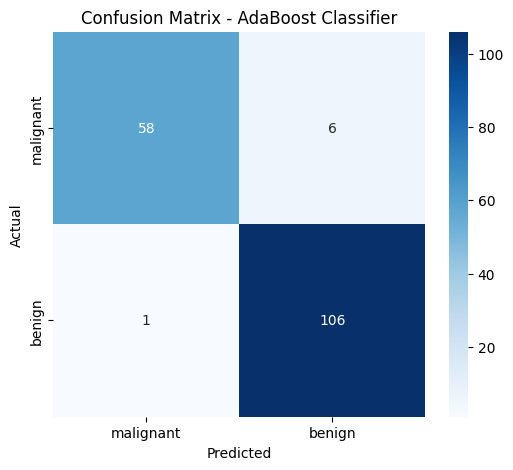


Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [15]:
y_pred = ada.predict(X_test_scaled)
y_prob = ada.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\n📊 Model Performance on Test Set:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


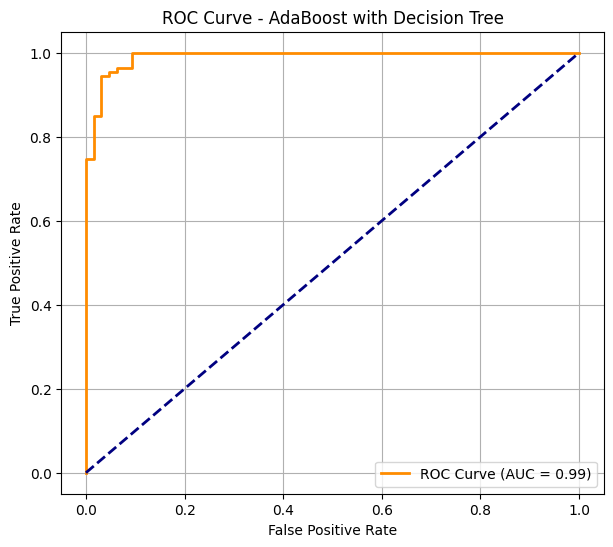

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost with Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()